# Clustering analysis and PCA #

### IMPORTANT: Please make sure that you are using the R kernel to run this notebook.###
We are now switching from the bash kernel to the R kernel. 
The R language provides a number of utilities for genomic data analysis and visualization. We will explore some of these. 

In [15]:
#The preprocessCore library provides a number of functions useful for statistical analysis,
#including functions for data normalization that we will use below. 
library("preprocessCore")

In [16]:
#Change to your $WORK_DIR. The syntax for switching directories in R is a little different than what we used in bash. 
#Use the "setwd" command to switch to your $WORK_DIR 
sunetid="ubuntu"
setwd(paste("/srv/scratch/training_camp/work/",sunetid,sep=""))
#The "dir" command will list all files in your current working directory 
dir()

[1] "all_merged.peaks.bed"   "all.fc.bigwig"          "all.fc.txt"            
 [4] "all.peaks.bed"          "all.peaks.sorted.bed"   "all.readcount.txt"     
 [7] "all.tagAlign.files.txt" "cln3-SCD-0_6MNaCl-Rep1" "cln3-SCD-0_6MNaCl-Rep2"
[10] "cln3-SCD-Rep1"          "cln3-SCD-Rep2"          "cln3-SCE-0_6MNaCl-Rep1"
[13] "cln3-SCE-0_6MNaCl-Rep2" "cln3-SCE-Rep1"          "cln3-SCE-Rep2"         
[16] "data"                   "narrowPeak_files.txt"   "src"                   
[19] "tmp"                    "whi5-cln3-SCE-Rep1"     "whi5-cln3-SCE-Rep2"    
[22] "whi5-SCE-Rep1"          "whi5-SCE-Rep2"          "WT-SCD-0_6MNaCl-Rep1"  
[25] "WT-SCD-0_6MNaCl-Rep2"   "WT-SCD-Rep1"            "WT-SCD-Rep1_out"       
[28] "WT-SCD-Rep2"            "WT-SCD-Rep2_out"        "WT-SCE-0_6MNaCl-Rep1"  
[31] "WT-SCE-0_6MNaCl-Rep2"   "WT-SCE-Rep1"            "WT-SCE-Rep2"

In [17]:
#load the fc signal matrix
fc_data=read.table("all.fc.txt",header=TRUE)
#remove the columns we will not use 
fc_data$Chrom=NULL
fc_data$Start=NULL
fc_data$End=NULL
rownames(fc_data)=fc_data$ID
fc_data$ID=NULL
head(fc_data)


WT.SCD.Rep1_R1_001,WT.SCD.Rep2_R1_001
2.39082,2.04151
1.13347,1.73337
2.93900,2.66924
1.95022,2.79871
1.85043,2.10170
2.17361,2.18958


In [18]:
#normalize the data 
#quantile normalization 
fc_data_matrix=normalize.quantiles(data.matrix(asinh(fc_data)))

In [19]:
colnames(fc_data_matrix)=names(fc_data)

In [20]:
head(fc_data_matrix)

WT.SCD.Rep1_R1_001,WT.SCD.Rep2_R1_001
1.598265,1.426437
1.114630,1.213119
1.763483,1.738327
1.449744,1.792747
1.414497,1.465063
1.528193,1.510675


Now, we load the matrix of read counts for each peak using the same series of commands as we used above for the fold change data matrix. 

In [24]:
#load the read count matrix
count_data=read.table("all.readcount.txt",header=TRUE)
#remove the columns we will not use 
count_data$Chrom=NULL
count_data$Start=NULL
count_data$End=NULL
rownames(count_data)=count_data$ID
count_data$ID=NULL
head(count_data)

#quantile normalize 
count_data_matrix=normalize.quantiles(data.matrix(asinh(count_data)))
colnames(count_data_matrix)=names(count_data)
head(count_data_matrix)

WT.SCD.Rep1_R1_001,WT.SCD.Rep2_R1_001
35,241
12,71
25,147
13,118
31,182
16,144


WT.SCD.Rep1_R1_001,WT.SCD.Rep2_R1_001
5.160875,5.267411
4.139845,3.977050
4.834087,4.756352
4.209330,4.524070
5.044203,4.978951
4.416354,4.746043


Much better! After quantile normalization, the read counts and fold change values across samples are on the same scale. 

In this tutorial we will focus on the clustering and PCA analysis steps of the pipeline: 
![Analysis pipeline](images/part3.png)

## Missing R packages##

When running the scripts in this section, if you get an error saying the gplots package has not been installed, you can install the package locally by  running the **3.5 Install R packages** notebook.

## Hierarchical Clustering of Fold Change Signal Across Samples ##

Cluster analysis is a simple way to visualize patterns in the data. By clustering peaks according to their signal across different time points, we may find groups of peaks that have similar behavior across these time points. By clustering samples according to their signal across peaks, we can perform a simple sanity check of data quality ‐ samples of the same time point should cluster together.

In [25]:
library(gplots)
library(RColorBrewer)

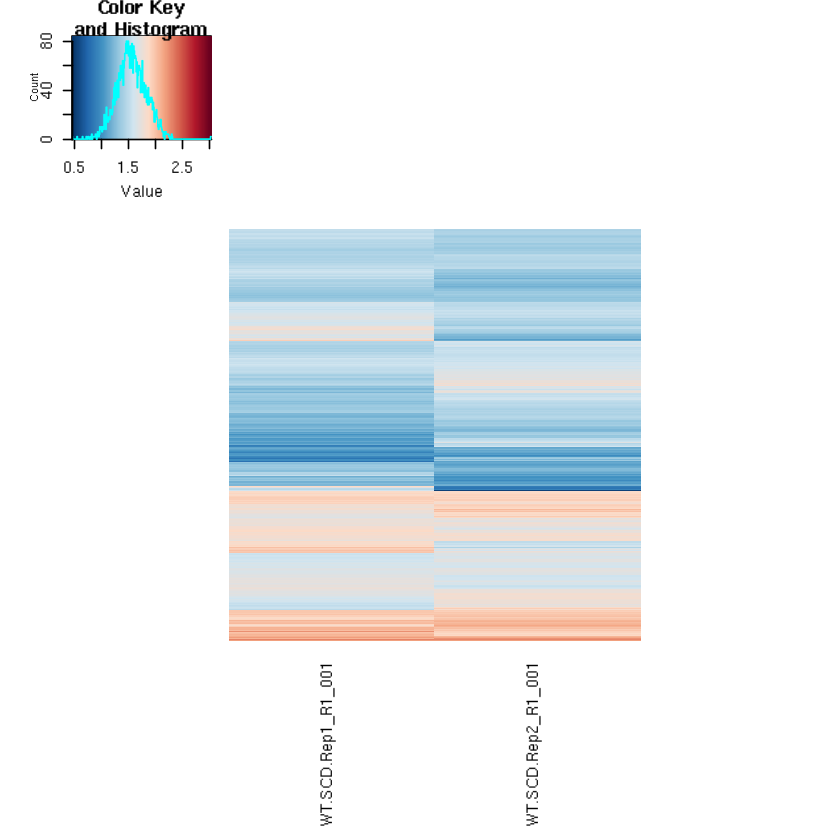

In [26]:
heatmap.2(fc_data_matrix,
          scale     = "none",
          col       = rev(colorRampPalette(brewer.pal(10, "RdBu"))(256)),
          distfun   = function(x) dist(x,method="euclidean"),
          hclustfun = function(x) hclust(x, method="ward.D"),
          Rowv=TRUE,
          Colv=TRUE,
          dendrogram = "none",
          trace="none",
          cexCol = 0.9,
          margins=c(10,10),
          labRow="")



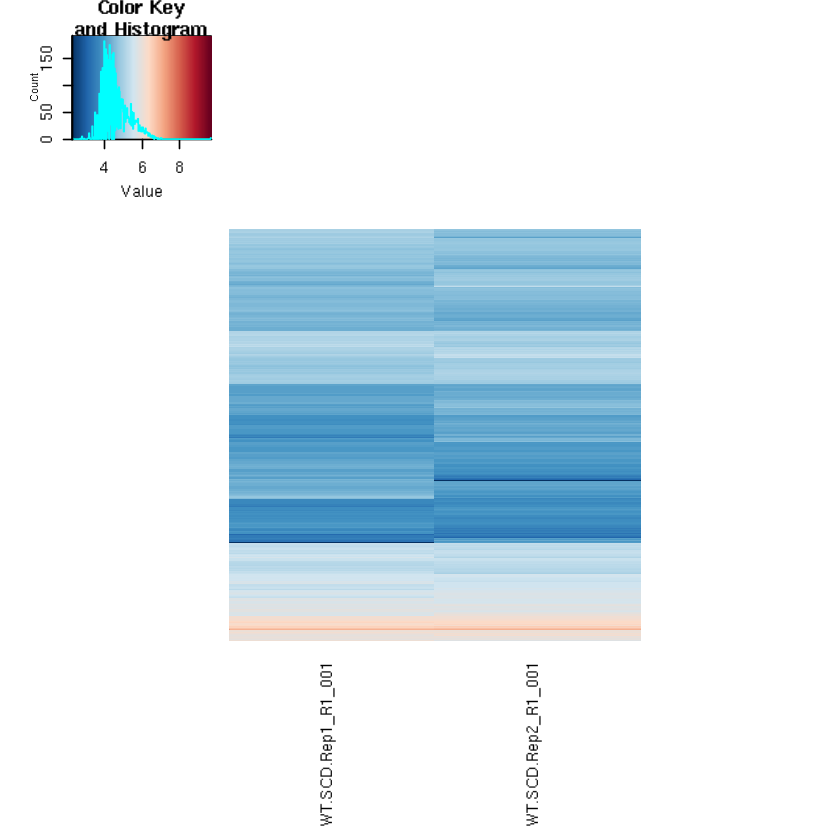

In [27]:
heatmap.2(count_data_matrix,
          scale     = "none",
          col       = rev(colorRampPalette(brewer.pal(10, "RdBu"))(256)),
          distfun   = function(x) dist(x,method="euclidean"),
          hclustfun = function(x) hclust(x, method="ward.D"),
          Rowv=TRUE,
          Colv=TRUE,
          dendrogram = "none",
          trace="none",
          cexCol = 0.9,
          margins=c(10,10),
          labRow="")

## PCA ##

PCA (Principal Component Analysis) is a way to identify the primary directions of variation in the data. It can also be used for very coarse-grained clustering of samples; similar samples will have similar coordinates along the principal axes.

We will perform PCA on *all.fc.txt*. We treat each sample as a single point in a very high dimensional space (where the dimensionality is equal to the number of genes the vary), and then we will perform dimensionality reduction in this space. We can color-code the PCA plots by "Strain", "Media", "Researcher", or "Rep" to determine which parameter separates the samples most effectively. 

In [ ]:
TODO:

explain pca code 
use qplot code 

add in batch correction section 
run model with confounders vs base model & subtract out the difference 
hide file i/o code 


In [ ]:
cd $SIGNAL_DIR
#color-code by Strain 
$SRC_DIR/doPCA.R $MASTER_DATA/foldChange.tab $MASTER_DATA/batches.txt  Strain

In [ ]:
#display the resulting PCA images
display < PCA_scree_plot.png
display < PC_1_vs_2.png 
display < PC_2_vs_3.png 
display < PC_1_vs_3.png
display < PC_3_vs_4.png 

Strain does not appear to be the main separator for the samples. What about media? 

In [ ]:
$SRC_DIR/doPCA.R $MASTER_DATA/foldChange.tab $MASTER_DATA/batches.txt Media
#display the resulting PCA images
display < PCA_scree_plot.png
display < PC_1_vs_2.png 
display < PC_2_vs_3.png 
display < PC_1_vs_3.png
display < PC_3_vs_4.png 

Exercise: Repeat the above analysis for "Media" and "Rep" variables. What PC is explained by Media? What PC is explained by Rep? 

We see that principal component 1 is pulling out the three samples that had very low read count : 

* Cln3-SCD-0_6MNaCl-Rep1
* Cln3-SCD-0_6MNaCl-Rep2

Interestingly, a sample with a relatively high number of reads is being separated as well: 
* Whi5-SCE-Rep2

Let's remove the 2 samples with low reads and re-run the PCA analysis. These 3 samples have been removed from the foldChange file to generate the file **$MASTER_DATA/foldChange.filtered.tab**

In [ ]:
$SRC_DIR/doPCA.R $MASTER_DATA/foldChange.filtered.tab $MASTER_DATA/batches.filtered.txt  Salt
#display the resulting PCA images
display < PCA_scree_plot.png
display < PC_1_vs_2.png 
display < PC_2_vs_3.png 
display < PC_1_vs_3.png
display < PC_3_vs_4.png 

In [ ]:
head -n20  pc1_rotation.txt

In [ ]:
head -n20 pc2_rotation.txt

This script will produce PCA_sdev.png, which shows the standard deviation explained by each of the principle components. Since there are only 32 datapoints, the effective dimensionality of our data is 32, even though there are thousands of genes; this is why there are only 32 PCs.

It also produces PC_[x]_vs_[y].png for components 1..3. How do you interpret the different principle components?

Finally, it produces the files pc[x]_rotation.txt for components 1..3, which show the contribution of each peak to the direction of the principle component; this file can be used to get a sense of which peaks are critical in defining the principle components, and in which direction (positive or negative). One interesting analysis we can do with these files is to sort the peaks by their contribution to the principle component in ascending or descending order, map the peaks to their nearest genes, and then used the ranked list with software such as GOrilla which accept a ranked list of genes and output which GO terms are overrepresented towards the top: (http://cbl-gorilla.cs.technion.ac.il/)

We will do this analysis in bash rather than in R, so continue on to the next tutorial to get started. 